# **CS210 - Introduction to Data Science**
## **Term Project**


## **Overview**

This project aims to examine changes in social media behavior, specifically YouTube viewing habits, during periods of increased academic stress, such as midterms and finals. By analyzing YouTube viewing history, we can gain insights into how academic pressures might influence media consumption.



## **Dataset**
This dataset is taken from takeout.google.com . In the dataset;

Columns:


**Video Title:** The title of the Youtube video.

**Channel Name:** The name of the youtube channel.

**Viewing Time:** The date and time when the video was watched.





## 1) Import necessary libraries

In [51]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [52]:
def parse_html_and_write_csv(html_file_path, csv_file_path):
    with open(html_file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'html.parser')

    entries = soup.find_all('div', class_='content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1')

    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Video Name', 'Channel Name', 'Time'])

        for entry in entries:
            links = entry.find_all('a')
            if len(links) >= 2:
                video_name = links[0].get_text().strip()
                channel_name = links[1].get_text().strip()
                time_text = entry.contents[-1].strip()
                time = ' '.join(time_text.split(' ')[:3])

                csvwriter.writerow([video_name, channel_name, time])
            else:
                # Optionally handle or log the case with insufficient links
                continue

# Example usage
html_file_path = r'C:\Users\mbboc\Desktop\cs210\term_project\izleme_gecmisi.html'
csv_file_path = r'C:\Users\mbboc\Desktop\cs210\term_project\output.csv'
parse_html_and_write_csv(html_file_path, csv_file_path)

In [53]:
df = pd.read_csv(csv_file_path)
turkish_to_english_months = {
    'Oca': 'Jan', 'Şub': 'Feb', 'Mar': 'Mar', 'Nis': 'Apr', 'May': 'May', 'Haz': 'Jun',
    'Tem': 'Jul', 'Ağu': 'Aug', 'Eyl': 'Sep', 'Eki': 'Oct', 'Kas': 'Nov', 'Ara': 'Dec'
}

df['Time'] = df['Time'].replace(turkish_to_english_months, regex=True)
df['Time'] = pd.to_datetime(df['Time'], format='%d %b %Y', errors='coerce')
print(df.head())
print(df.info())



                                          Video Name Channel Name       Time
0  Sezon 14 Viego Sadece 2 Tank Eşyasıyla Kral Öl...   Elayja LoL 2024-01-19
1  Google Arama Geçmişi Bilgisayara Nasıl İndirilir?     Tamindir 2024-01-19
2                 🔴 CYBERPUNK 2.0 ve PHANTOM LIBERTY   Pintipanda 2024-01-18
3  🔴 KİMSENİN GÖZ YAŞINA BAKMAM !! | Battlefield ...   Pintipanda 2024-01-18
4  🔴 ESKİ TOPRAKLARA DÖNÜYORUZ | The Long Dark : ...   Pintipanda 2024-01-18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Video Name    4249 non-null   object        
 1   Channel Name  4249 non-null   object        
 2   Time          4249 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 99.7+ KB
None


In [54]:
channel_counts = df['Channel Name'].value_counts()
print(channel_counts.head(15))

Channel Name
TaoWB                             119
Real Civil Engineer                95
Pintipanda                         65
carwow                             64
Elayja LoL                         60
Valiant                            48
Mrwhosetheboss                     46
Orkun Işıtmak                      45
ALL ABOUT ELECTRONICS              44
BUders Boğaziçiliden Özel Ders     41
Zeynep Bastık                      38
Tuna Tavus                         36
Asitmen                            35
Donut                              28
Hipyo Tech                         28
Name: count, dtype: int64


In [55]:
education_channels = ["ALL ABOUT ELECTRONICS", "BUders Boğaziçiliden Özel Ders","ALL ABOUT ELECTRONICS - Quiz"]
music_channels = ["Zeynep Bastık", "Akustikhane"]
# Lists to store rows for each category
education_rows = []
entertainment_rows = []
music_rows = []

# Iterate through each row and classify based on conditions
for index, row in df.iterrows():
    if row['Channel Name'] in education_channels or 'c++' in row['Video Name'].lower():
        education_rows.append(row)
    elif row['Channel Name'] in music_channels:
        music_rows.append(row)
    else:
        entertainment_rows.append(row)

# Create DataFrames from the lists
df_education = pd.DataFrame(education_rows)
df_entertainment = pd.DataFrame(entertainment_rows)
df_music = pd.DataFrame(music_rows)

# Display the first few rows of each DataFrame
print("Education DataFrame:")
print(df_education.head())
print(len(df_education))
print("\nEntertainment DataFrame:")
print(df_entertainment.head())
print(len(df_entertainment))
print("\nMusic DataFrame:")
print(df_music.head())
print(len(df_music))

Education DataFrame:
                                            Video Name  \
314             Ayrık Matematik : Bir Bağıntının Tersi   
315  Ayrık Matematik : Bağıntıların Gösterim Biçimleri   
316             Ayrık Matematik : Bağıntı Sayısı Bulma   
317       Ayrık Matematik : Bağıntı (Relations) Nedir?   
318  Kartezyen Çarpım : Kartezyen Çarpım Nedir? (ww...   

                       Channel Name       Time  
314  BUders Boğaziçiliden Özel Ders 2024-01-12  
315  BUders Boğaziçiliden Özel Ders 2024-01-12  
316  BUders Boğaziçiliden Özel Ders 2024-01-12  
317  BUders Boğaziçiliden Özel Ders 2024-01-12  
318  BUders Boğaziçiliden Özel Ders 2024-01-12  
107

Entertainment DataFrame:
                                          Video Name Channel Name       Time
0  Sezon 14 Viego Sadece 2 Tank Eşyasıyla Kral Öl...   Elayja LoL 2024-01-19
1  Google Arama Geçmişi Bilgisayara Nasıl İndirilir?     Tamindir 2024-01-19
2                 🔴 CYBERPUNK 2.0 ve PHANTOM LIBERTY   Pintipanda 2024-01-1

In [56]:
start_date = df['Time'].min()
end_date = df['Time'].max()
total_days = (end_date - start_date).days + 1
total_videos = len(df)
average_videos_per_day = total_videos / total_days
print(f"\nAverage number of videos watched per day: {average_videos_per_day:.2f}")


Average number of videos watched per day: 30.57


In [57]:
avg_education_per_day = len(df_education) / total_days
avg_music_per_day = len(df_music) / total_days
avg_entertainment_per_day = len(df_entertainment) / total_days

# Display the averages
print(f"Average education videos watched per day: {avg_education_per_day:.2f}")
print(f"Average music videos watched per day: {avg_music_per_day:.2f}")
print(f"Average entertainment videos watched per day: {avg_entertainment_per_day:.2f}")




Average education videos watched per day: 0.77
Average music videos watched per day: 0.29
Average entertainment videos watched per day: 29.51


In [58]:
exam_dates = {
    "math204 final": "2024-01-13",
    "math204 midterm": "2023-11-22",
    "cs303 midterm 2": "2023-12-16",
    "cs303 midterm 1": "2023-11-04",
    "cs303 final": "2024-01-10",
    "cs204 midterm 1": "2023-11-17",
    "cs204 midterm 2": "2023-12-22",
    "cs204 final": "2024-01-13",
    "cs210 final": "2024-01-11",
    "ens208 midterm 1": "2023-11-15",
    "ens208 midterm 2": "2023-12-20",
    "ens 208 final": "2024-01-08"
}



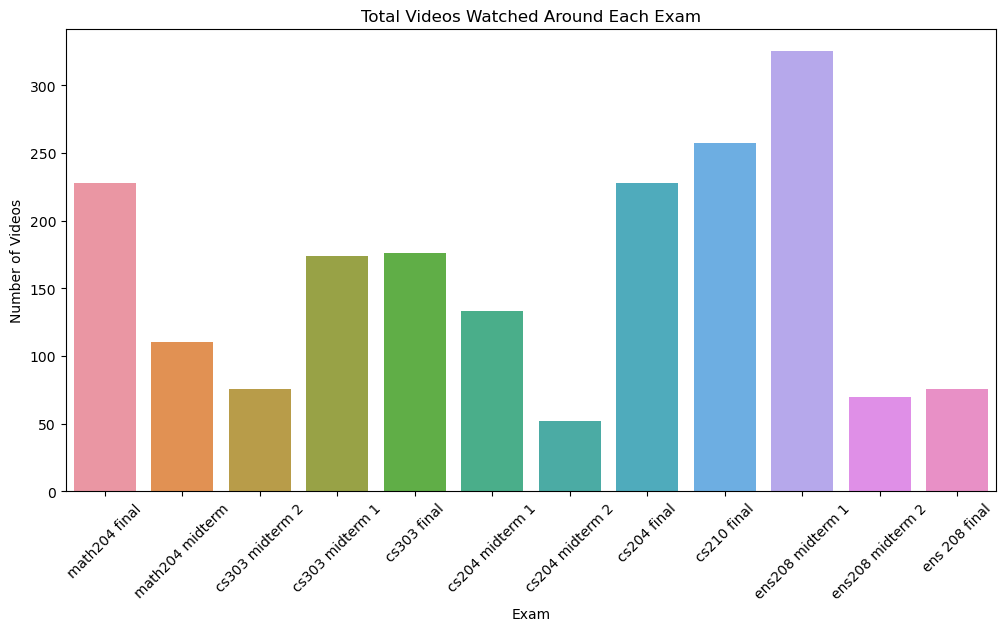

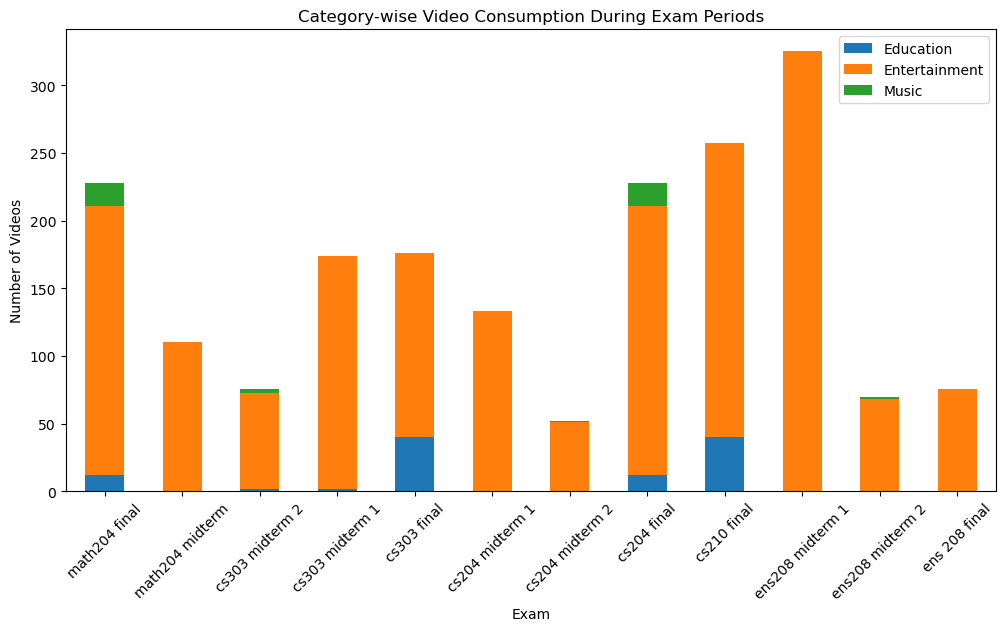

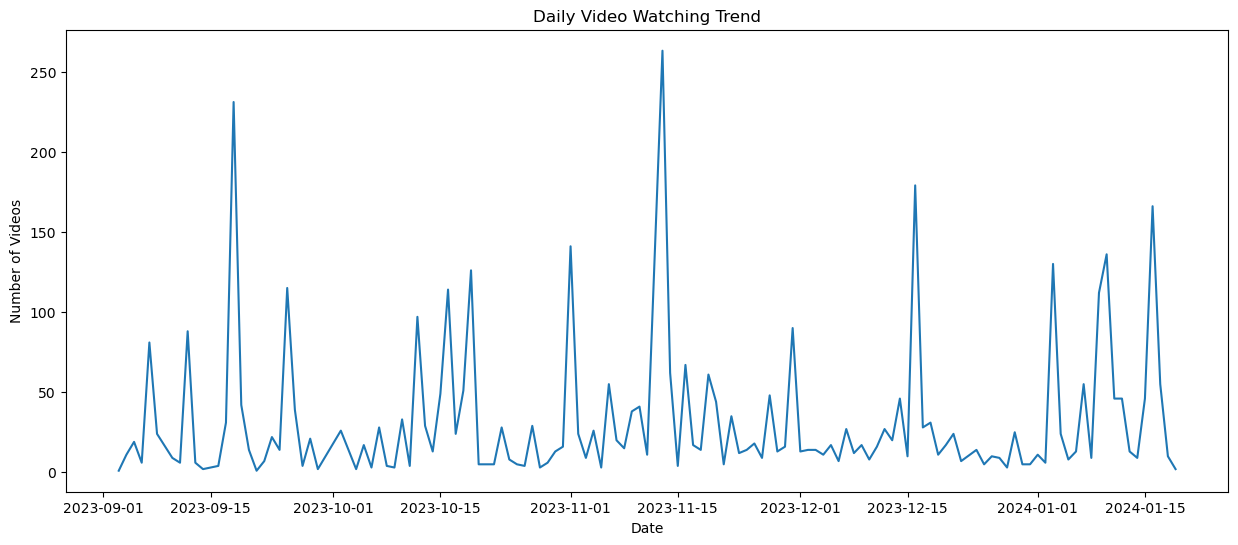

In [59]:
def get_video_counts_around_exams(df, df_education, df_entertainment, df_music, exam_dates):
    data = []
    for exam, date in exam_dates.items():
        exam_date = pd.to_datetime(date)
        start_date = exam_date - timedelta(days=3)

        exam_period_videos = df[(df['Time'] >= start_date) & (df['Time'] < exam_date)]
        exam_period_edu = df_education[(df_education['Time'] >= start_date) & (df_education['Time'] < exam_date)]
        exam_period_ent = df_entertainment[(df_entertainment['Time'] >= start_date) & (df_entertainment['Time'] < exam_date)]
        exam_period_music = df_music[(df_music['Time'] >= start_date) & (df_music['Time'] < exam_date)]

        data.append({
            'Exam': exam,
            'Total': len(exam_period_videos),
            'Education': len(exam_period_edu),
            'Entertainment': len(exam_period_ent),
            'Music': len(exam_period_music)
        })
    return pd.DataFrame(data)

# Generate the DataFrame
exam_data = get_video_counts_around_exams(df, df_education, df_entertainment, df_music, exam_dates)

# Plot 1: Bar Chart of Total Videos Watched
plt.figure(figsize=(12, 6))
sns.barplot(x='Exam', y='Total', data=exam_data)
plt.xticks(rotation=45)
plt.title('Total Videos Watched Around Each Exam')
plt.ylabel('Number of Videos')
plt.xlabel('Exam')
plt.show()

# Plot 2: Stacked Bar Chart of Categories
exam_data.set_index('Exam', inplace=True)
exam_data[['Education', 'Entertainment', 'Music']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category-wise Video Consumption During Exam Periods')
plt.ylabel('Number of Videos')
plt.xlabel('Exam')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Time Series of Daily Video Consumption (overall, not exam-specific)
daily_videos = df.groupby(df['Time'].dt.date).size()
plt.figure(figsize=(15, 6))
daily_videos.plot(kind='line')
plt.title('Daily Video Watching Trend')
plt.ylabel('Number of Videos')
plt.xlabel('Date')
plt.show()







In [60]:
def analyze_average_changes_around_exams(df, df_education, df_entertainment, df_music, exam_dates):
    overall_avg = len(df) / total_days
    overall_avg_edu = len(df_education) / total_days
    overall_avg_ent = len(df_entertainment) / total_days
    overall_avg_music = len(df_music) / total_days

    for exam, date in exam_dates.items():
        exam_date = pd.to_datetime(date)
        start_date = exam_date - timedelta(days=3)

        exam_period_videos = df[(df['Time'] >= start_date) & (df['Time'] < exam_date)]
        exam_period_edu = df_education[(df_education['Time'] >= start_date) & (df_education['Time'] < exam_date)]
        exam_period_ent = df_entertainment[(df_entertainment['Time'] >= start_date) & (df_entertainment['Time'] < exam_date)]
        exam_period_music = df_music[(df_music['Time'] >= start_date) & (df_music['Time'] < exam_date)]

        exam_avg = len(exam_period_videos) / 3
        exam_avg_edu = len(exam_period_edu) / 3
        exam_avg_ent = len(exam_period_ent) / 3
        exam_avg_music = len(exam_period_music) / 3

        print(f"\nExam: {exam} ({date})")
        print(f"Average videos watched per day around exam: {exam_avg:.2f} (Overall average: {overall_avg:.2f})")
        print(f"Average education videos: {exam_avg_edu:.2f} (Overall average: {overall_avg_edu:.2f})")
        print(f"Average entertainment videos: {exam_avg_ent:.2f} (Overall average: {overall_avg_ent:.2f})")
        print(f"Average music videos: {exam_avg_music:.2f} (Overall average: {overall_avg_music:.2f})")

# Analyze average changes around exam dates
analyze_average_changes_around_exams(df, df_education, df_entertainment, df_music, exam_dates)


Exam: math204 final (2024-01-13)
Average videos watched per day around exam: 76.00 (Overall average: 30.57)
Average education videos: 4.00 (Overall average: 0.77)
Average entertainment videos: 66.33 (Overall average: 29.51)
Average music videos: 5.67 (Overall average: 0.29)

Exam: math204 midterm (2023-11-22)
Average videos watched per day around exam: 36.67 (Overall average: 30.57)
Average education videos: 0.00 (Overall average: 0.77)
Average entertainment videos: 36.67 (Overall average: 29.51)
Average music videos: 0.00 (Overall average: 0.29)

Exam: cs303 midterm 2 (2023-12-16)
Average videos watched per day around exam: 25.33 (Overall average: 30.57)
Average education videos: 0.67 (Overall average: 0.77)
Average entertainment videos: 23.67 (Overall average: 29.51)
Average music videos: 1.00 (Overall average: 0.29)

Exam: cs303 midterm 1 (2023-11-04)
Average videos watched per day around exam: 58.00 (Overall average: 30.57)
Average education videos: 0.67 (Overall average: 0.77)
Av

In [61]:
weekdays_rows = []
weekends_rows = []

# Classify each video into weekdays or weekends
for index, row in df.iterrows():
    if row['Time'].dayofweek < 5:  # Monday=0, Sunday=6
        weekdays_rows.append(row)
    else:
        weekends_rows.append(row)

# Create DataFrames from the lists
df_weekdays = pd.DataFrame(weekdays_rows)
df_weekends = pd.DataFrame(weekends_rows)

print("Weekdays DataFrame:")
print(df_weekdays.head())

print("\nWeekends DataFrame:")
print(df_weekends.head())

Weekdays DataFrame:
                                          Video Name Channel Name       Time
0  Sezon 14 Viego Sadece 2 Tank Eşyasıyla Kral Öl...   Elayja LoL 2024-01-19
1  Google Arama Geçmişi Bilgisayara Nasıl İndirilir?     Tamindir 2024-01-19
2                 🔴 CYBERPUNK 2.0 ve PHANTOM LIBERTY   Pintipanda 2024-01-18
3  🔴 KİMSENİN GÖZ YAŞINA BAKMAM !! | Battlefield ...   Pintipanda 2024-01-18
4  🔴 ESKİ TOPRAKLARA DÖNÜYORUZ | The Long Dark : ...   Pintipanda 2024-01-18

Weekends DataFrame:
                                            Video Name Channel Name       Time
279  JAPONYA VS TÜRKİYE ATIŞTIRMALIKLARINI KARŞILAŞ...   TepkiKolik 2024-01-14
280  INTERNET CAFE SIMULATOR TADINDA EFSANE OYUN CO...    Barış Can 2024-01-14
281         BUNLARI KULLANAN HERKES YEMEK YAPABİLECEK!   TepkiKolik 2024-01-14
282          KUTLAMA YEMEĞİ! @AlperRENDE @BetulCakmak5   Tuna Tavus 2024-01-14
283  🔴 ESKİ TOPRAKLARA DÖNÜYORUZ | The Long Dark : ...   Pintipanda 2024-01-14


In [62]:
education_weekdays_rows = []
entertainment_weekdays_rows = []
music_weekdays_rows = []

education_weekends_rows = []
entertainment_weekends_rows = []
music_weekends_rows = []

# Classify each video in weekdays DataFrame
for index, row in df_weekdays.iterrows():
    if row['Channel Name'] in education_channels or 'c++' in row['Video Name'].lower():
        education_weekdays_rows.append(row)
    elif row['Channel Name'] in music_channels:
        music_weekdays_rows.append(row)
    else:
        entertainment_weekdays_rows.append(row)

# Classify each video in weekends DataFrame
for index, row in df_weekends.iterrows():
    if row['Channel Name'] in education_channels or 'c++' in row['Video Name'].lower():
        education_weekends_rows.append(row)
    elif row['Channel Name'] in music_channels:
        music_weekends_rows.append(row)
    else:
        entertainment_weekends_rows.append(row)

# Create categorized DataFrames from the lists
df_education_weekdays = pd.DataFrame(education_weekdays_rows)
df_entertainment_weekdays = pd.DataFrame(entertainment_weekdays_rows)
df_music_weekdays = pd.DataFrame(music_weekdays_rows)

df_education_weekends = pd.DataFrame(education_weekends_rows)
df_entertainment_weekends = pd.DataFrame(entertainment_weekends_rows)
df_music_weekends = pd.DataFrame(music_weekends_rows)


In [63]:
total_days = df['Time'].nunique()

# Calculate total videos for each category in the original DataFrame
total_edu = len(df_education)
total_ent = len(df_entertainment)
total_music = len(df_music)

# Calculate total videos for each category in weekdays and weekends
total_edu_weekdays = len(df_education_weekdays)
total_ent_weekdays = len(df_entertainment_weekdays)
total_music_weekdays = len(df_music_weekdays)

total_edu_weekends = len(df_education_weekends)
total_ent_weekends = len(df_entertainment_weekends)
total_music_weekends = len(df_music_weekends)

# Calculate averages for the original DataFrame
avg_edu_per_day = total_edu / total_days
avg_ent_per_day = total_ent / total_days
avg_music_per_day = total_music / total_days

# Calculate averages for weekdays and weekends
avg_edu_per_weekday = total_edu_weekdays / total_weekdays
avg_ent_per_weekday = total_ent_weekdays / total_weekdays
avg_music_per_weekday = total_music_weekdays / total_weekdays

avg_edu_per_weekend = total_edu_weekends / total_weekends
avg_ent_per_weekend = total_ent_weekends / total_weekends
avg_music_per_weekend = total_music_weekends / total_weekends

# Display the results
print(f"Average education videos per day: {avg_edu_per_day:.2f}")
print(f"Average entertainment videos per day: {avg_ent_per_day:.2f}")
print(f"Average music videos per day: {avg_music_per_day:.2f}")
print(f"Average videos per day: {avg_edu_per_day+avg_ent_per_day+avg_music_per_day:.2f}")


print(f"\nAverage education videos per weekday: {avg_edu_per_weekday:.2f}")
print(f"Average entertainment videos per weekday: {avg_ent_per_weekday:.2f}")
print(f"Average music videos per weekday: {avg_music_per_weekday:.2f}")
print(f"Average videos per weekday: {avg_music_per_weekday+avg_ent_per_weekday+avg_edu_per_weekday:.2f}")


print(f"\nAverage education videos per weekend: {avg_edu_per_weekend:.2f}")
print(f"Average entertainment videos per weekend: {avg_ent_per_weekend:.2f}")
print(f"Average music videos per weekend: {avg_music_per_weekend:.2f}")
print(f"Average videos per weekend: {avg_music_per_weekend+avg_music_per_weekend+avg_ent_per_weekend+avg_edu_per_weekend:.2f}")


Average education videos per day: 0.82
Average entertainment videos per day: 31.31
Average music videos per day: 0.31
Average videos per day: 32.44

Average education videos per weekday: 0.97
Average entertainment videos per weekday: 34.79
Average music videos per weekday: 0.41
Average videos per weekday: 36.16

Average education videos per weekend: 0.36
Average entertainment videos per weekend: 21.00
Average music videos per weekend: 0.00
Average videos per weekend: 21.36
